# App

## Package

In [1]:
from typing import Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle

from utils import get_data, get_metrics
from classic_CV import create_result_classic
from NN_model import get_NN_model

## Import data

In [2]:
data = get_data(path='../data/HRF/')

In [3]:
MLdata = pd.read_csv('../data/for_CML/test_data.csv')

In [4]:
features_classic_ml = ['ch_avg_B', 'ch_avg_G', 'ch_avg_R', 'ch_std_B',
       'ch_std_G', 'ch_std_R', 'hu_mom1', 'hu_mom2', 'hu_mom3', 'hu_mom4',
       'hu_mom5', 'hu_mom6', 'hu_mom7', 'sp_mom_00', 'sp_mom_10', 'sp_mom_01',
       'sp_mom_20', 'sp_mom_11', 'sp_mom_02', 'sp_mom_30', 'sp_mom_21',
       'sp_mom_12', 'sp_mom_03', 'nu_mom_20', 'nu_mom_11', 'nu_mom_02',
       'nu_mom_30', 'nu_mom_21', 'nu_mom_12', 'nu_mom_03']

## Import models

In [12]:
classic_model = pickle.load(open('../trained/RFC_model','rb'))
NN_model = get_NN_model()
NN_model.load_weights('../trained/NN_model.h5')

# Main

In [6]:
def final_function(model: str='classic_CV', index: int=0) -> Union[Tuple[None, None], Tuple[np.ndarray, Tuple[float, float, float]]]:
    models = ['classic_CV', 'classic_ML', 'NN']
    dim = (876, 584)
    if model in models:
        if model == 'classic_CV':
            result = create_result_classic(data['original'][index][:, :, 1], data['mask'][index])
            metrics = get_metrics(result, data['labeled'][index])
        else:
            if index not in [0, 1, 2, 3, 4]:
                print('Wrong index. Choose between 0 and 4!')
                return None, None
            image = MLdata.loc[MLdata.id == index]
            if model == 'classic_ML':
                result = classic_model.predict_proba(image.drop(['Unnamed: 0', 'id', 'label'], axis=1))[:,1]
            else:
                result = NN_model.predict(image.drop(['Unnamed: 0', 'id', 'label'], axis=1))
            result = np.where(result > 0.3, 255, 0)
            result = np.pad(result.reshape(dim[1]-4, dim[0]-4), 2)
            label = cv2.resize(data['labeled'][index], dim, interpolation=cv2.INTER_AREA)
            label = np.where(label > 190, 255, 0)
            metrics = get_metrics(result, label)
    else:
        print('Wrong model')
        return None, None
    return result, metrics

In [7]:
def show_results(model, start=0, stop=5):
    metrics_summary = np.array([0.0, 0.0, 0.0])
    plt.figure(figsize=(5*2, 5*(stop-start)))
    num = stop-start

    for index in range(start, stop):
        new_plot, metric = final_function(model=model, index=index)
        print(f'{metric = }')
        metrics_summary += metric
        plt.subplot(num, 2, index*2+1)
        plt.imshow(new_plot, cmap='gray')
        plt.subplot(num, 2, index*2+2)
        plt.imshow(data['labeled'][index], cmap='gray')
    metrics_summary = metrics_summary/5
    print(f'accuracy:{metrics_summary[0]}, sensitivity:{metrics_summary[1]}, specificity:{metrics_summary[2]}')

### Classic test

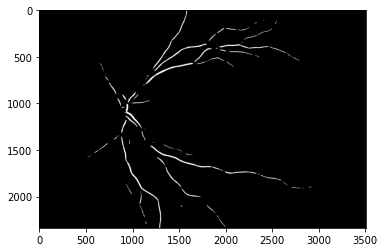

In [8]:
new_plot, metric = final_function(model='classic_CV', index=1)
plt.imshow(new_plot, cmap='gray')

metric = (0.9150950772502658, 0.9817846341666435, 0.9138994525679067)
metric = (0.9135054067367235, 0.9966576350295671, 0.9124652501948859)
metric = (0.9077386362747858, 0.9680628092358439, 0.9068682977466151)
metric = (0.9308565406658535, 0.9792666896622447, 0.9295535836383002)
metric = (0.9355539608353662, 0.9783286920690982, 0.934367874237915)
accuracy:0.920549924352599, sensitivity:0.9808200920326794, specificity:0.9194308916771247


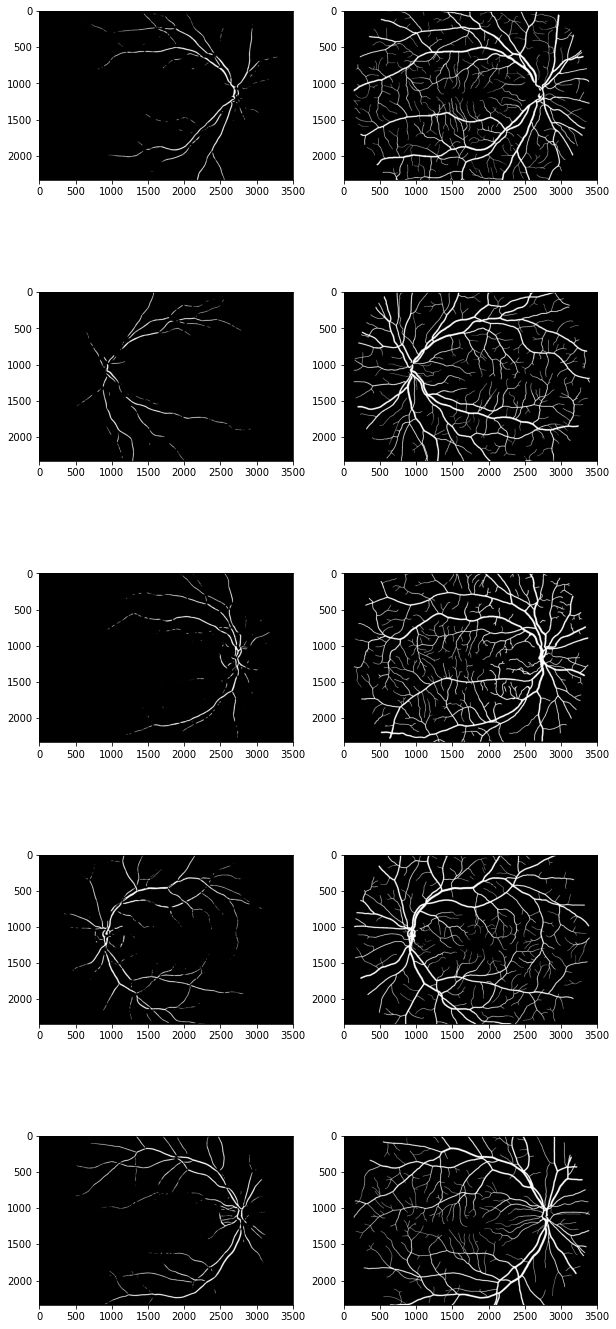

In [9]:
show_results('classic_CV')

## ML test

metric = (0.9130269906799274, 0.5311771108692271, 0.9178882437598114)
metric = (0.9120379057984612, 0.449823843618593, 0.920126893204849)
metric = (0.907033839994996, 0.497787610619469, 0.9073957412175329)
metric = (0.9178746794270345, 0.4981549815498155, 0.9196609450822117)
metric = (0.9214733064364796, 0.49416909620991256, 0.9226223609009588)
accuracy:0.9142893444673797, sensitivity:0.49422252857340343, specificity:0.9175388368330728


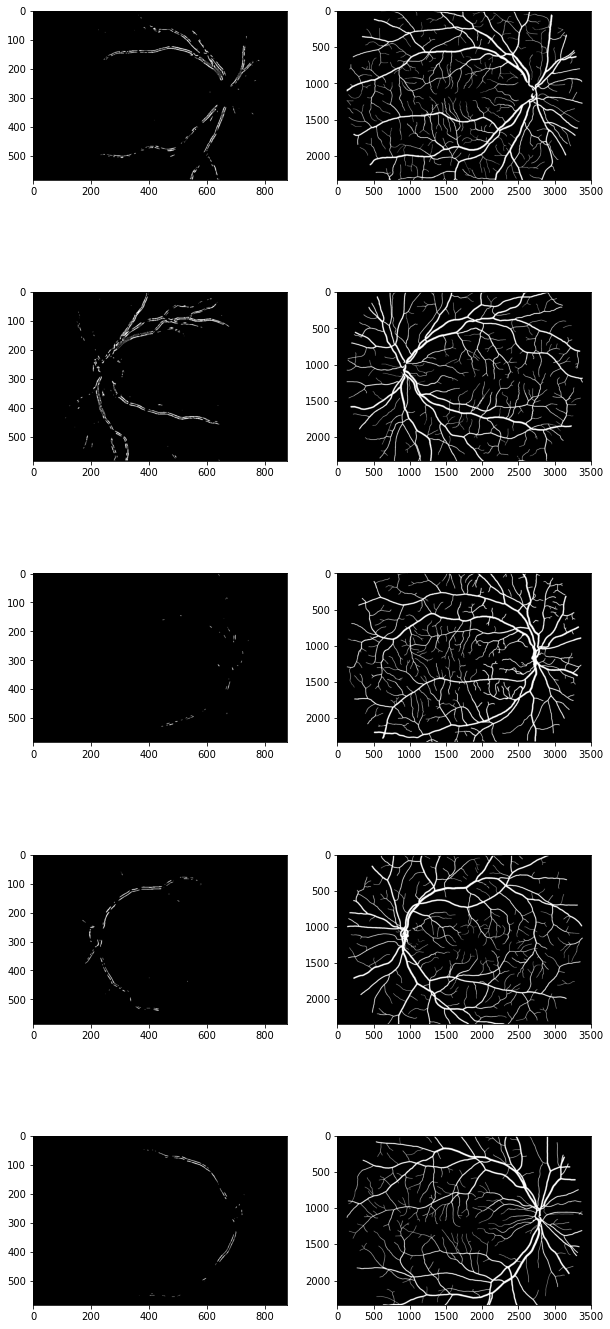

In [10]:
show_results('classic_ML')

metric = (0.9102122036654782, 0.3458914268762978, 0.9139553691070477)
metric = (0.910966722962407, 0.35134012050696034, 0.9162817130419855)
metric = (0.9069263307687496, 0.473138548539114, 0.9078278549644189)
metric = (0.9178746794270345, 0.49272727272727274, 0.9183322440385571)
metric = (0.9216355476324514, 0.529567519858782, 0.9225057841007266)
accuracy:0.9135230968912241, sensitivity:0.4385329777016854, specificity:0.9157805930505472


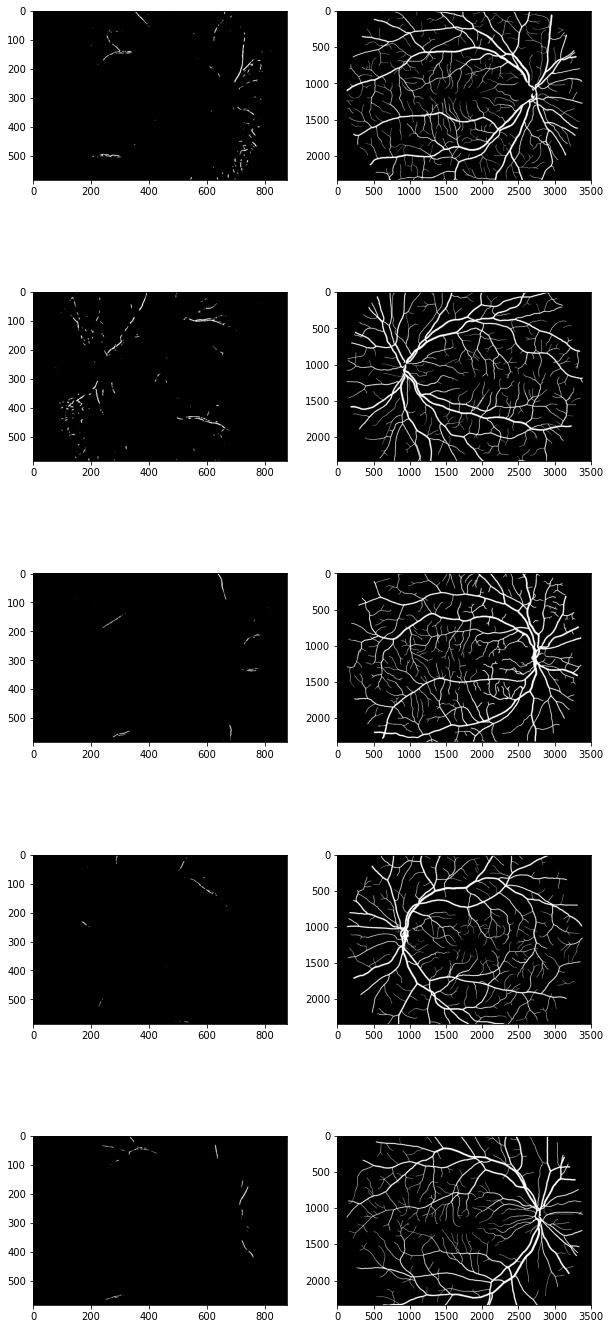

In [13]:
show_results('NN')